Neural Network with Fashion-MNIST

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Flatten, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Load dataset from Tensorflow

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Check Shape of Data

In [4]:
train_images.shape

(60000, 28, 28)

View image of dataset

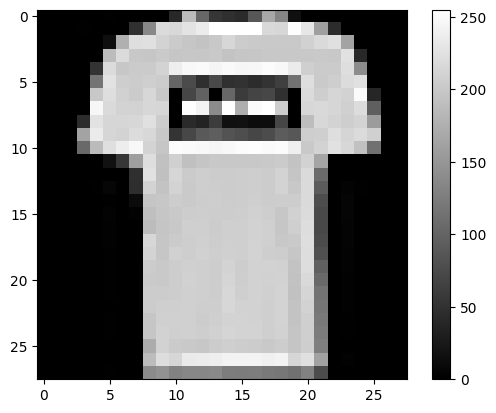

In [5]:
plt.figure()
plt.imshow(train_images[1], cmap= 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

Resize dataset

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

View 25 images with label

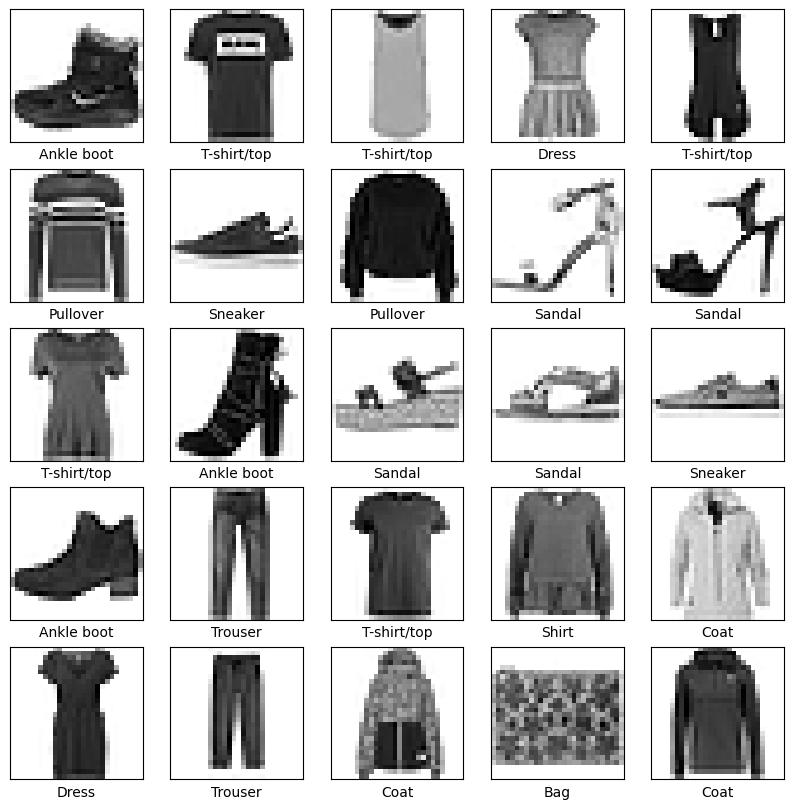

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Create Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compile Model

In [9]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the model

In [11]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 3ms/step - loss: 0.4964 - accuracy: 0.8266
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8630
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3386 - accuracy: 0.8757
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8844
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.8920
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2810 - accuracy: 0.8959
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9001
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9040
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9071
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accura

Verify Accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3855 - accuracy: 0.8949 - 719ms/epoch - 2ms/step

Test accuracy: 0.8949000239372253


Model predict

In [13]:
y_pred = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


Classification report

In [14]:
y_pred = [np.argmax(arr) for arr in y_pred]
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.80      0.81      1000
           3       0.88      0.92      0.90      1000
           4       0.79      0.85      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.78      0.66      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Confusion matrix

In [15]:
cm = confusion_matrix(test_labels,y_pred)
cm

array([[880,   1,  14,  20,   5,   1,  69,   0,  10,   0],
       [  2, 976,   1,  16,   3,   0,   1,   0,   1,   0],
       [ 16,   1, 795,  10, 125,   1,  48,   1,   3,   0],
       [ 30,   4,  11, 918,  16,   0,  16,   0,   5,   0],
       [  0,   0,  62,  38, 849,   0,  51,   0,   0,   0],
       [  0,   0,   0,   1,   0, 970,   0,  16,   1,  12],
       [146,   4,  75,  32,  71,   0, 664,   0,   8,   0],
       [  0,   0,   0,   0,   0,   7,   0, 970,   1,  22],
       [  5,   0,   1,   4,   6,   1,   4,   3, 976,   0],
       [  0,   0,   0,   0,   0,   7,   1,  41,   0, 951]])

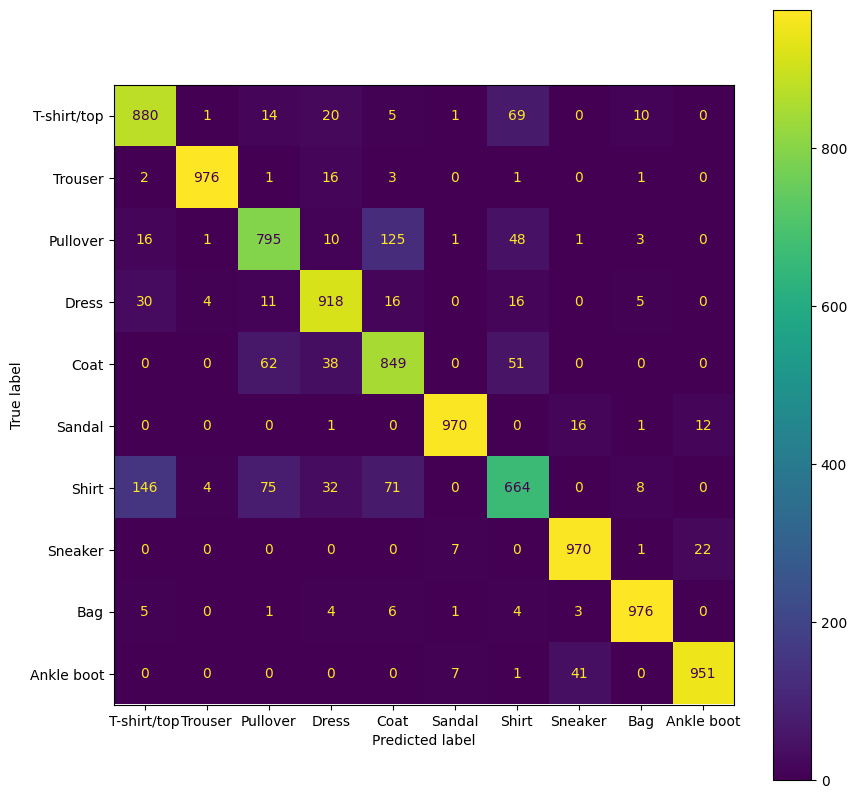

In [16]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);